In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'/Users/ryan/github/prosodic')
from llmdh import *

In [2]:
odf = RhymeLLM.gather_parse(max_per=1000)
odf

⎾ gathering all @ 2024-03-16 08:59:24,897
⎿ 2.3 seconds @ 2024-03-16 08:59:27,166
⎾ parsing @ 2024-03-16 08:59:27,171
￨ iterating: 100%|██████████| 6298/6298 [00:41<00:00, 151.19it/s] 


,model,system_prompt,example_prompts,user_prompt,input_data,response,is_valid,poem,num_stanzas,num_lines,num_rhymes,is_rhyming,corpus,author,Author,Title,Poetry Foundation ID,Content,poem_txt
0,gemini-pro,Please generate a text according to the formal...,[],Please write your answer with no more than 5-1...,{},"Sure, here is your text:\n\nThis is a text.\nI...",True,"Sure, here is your text:\n\nThis is a text.\nI...",2,4,0,False,LLM,LLM,,,,,"Sure, here is your text:\n\nThis is a text.\nI..."
1,gemini-pro,Please generate a text according to the formal...,[],Please write your answer with no more than 5-1...,{},"Sure, here is your text:\n\nI understand.\nI w...",True,"Sure, here is your text:\n\nI understand.\nI w...",2,4,0,False,LLM,LLM,,,,,"Sure, here is your text:\n\nI understand.\nI w..."
2,gemini-pro,Please generate a text according to the formal...,[],Please write your answer with no more than 5-1...,{},"Sure, here is your text:\n\nThis is a text.\nI...",True,"Sure, here is your text:\n\nThis is a text.\nI...",2,4,0,False,LLM,LLM,,,,,"Sure, here is your text:\n\nThis is a text.\nI..."
3,gemini-pro,Please generate a text according to the formal...,[],Please write your answer with no more than 5-1...,{},"Sure, I can do that.\n\nHere is an example of ...",True,"Sure, I can do that.\n\nHere is an example of ...",3,5,1,False,LLM,LLM,,,,,"Sure, I can do that.\n\nHere is an example of ..."
4,gemini-pro,Please generate a text according to the formal...,[],Please write your answer with no more than 5-1...,{},"Sure, I can do that.\n\nHere is an example:\n\...",True,"Sure, I can do that.\n\nHere is an example:\n\...",3,5,0,False,LLM,LLM,,,,,"Sure, I can do that.\n\nHere is an example:\n\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,,,,,,,,,3,15,2,True,poetryfoundation.org,Poets,Linda Pastan,The Quarrel,50747.0,"If there were a monument\nto silence, it would...","If there were a monument\nto silence, it would..."
6293,,,,,,,,,5,15,0,False,poetryfoundation.org,Poets,Elizabeth Alexander,Minnesota Fats Describes His Youth,52417.0,I’ve been eating\nlike a sultan\nsince I was t...,I’ve been eating\nlike a sultan\nsince I was t...
6294,,,,,,,,,3,15,0,True,poetryfoundation.org,Poets,David Huddle,Stores,58680.0,"Fifteen I got a job at Leggett's, stock\nboy, ...","Fifteen I got a job at Leggett's, stock\nboy, ..."
6295,,,,,,,,,15,15,0,False,poetryfoundation.org,Poets,Naomi Shihab Nye,300 Goats,58630.0,In icy fields.\n\nIs water flowing in the tank...,In icy fields.\n\nIs water flowing in the tank...


In [3]:
# !pip install plotnine
import plotnine as p9
p9.options.dpi = 300
figdf = odf.query('num_rhymes <= 25 & num_lines <= 25')
figdf = pd.concat(
    gdf.assign(group_count=len(gdf))
    for g,gdf in figdf.groupby(['num_rhymes','num_lines'])
).drop_duplicates('poem_txt')
figdf.shape

(6297, 20)

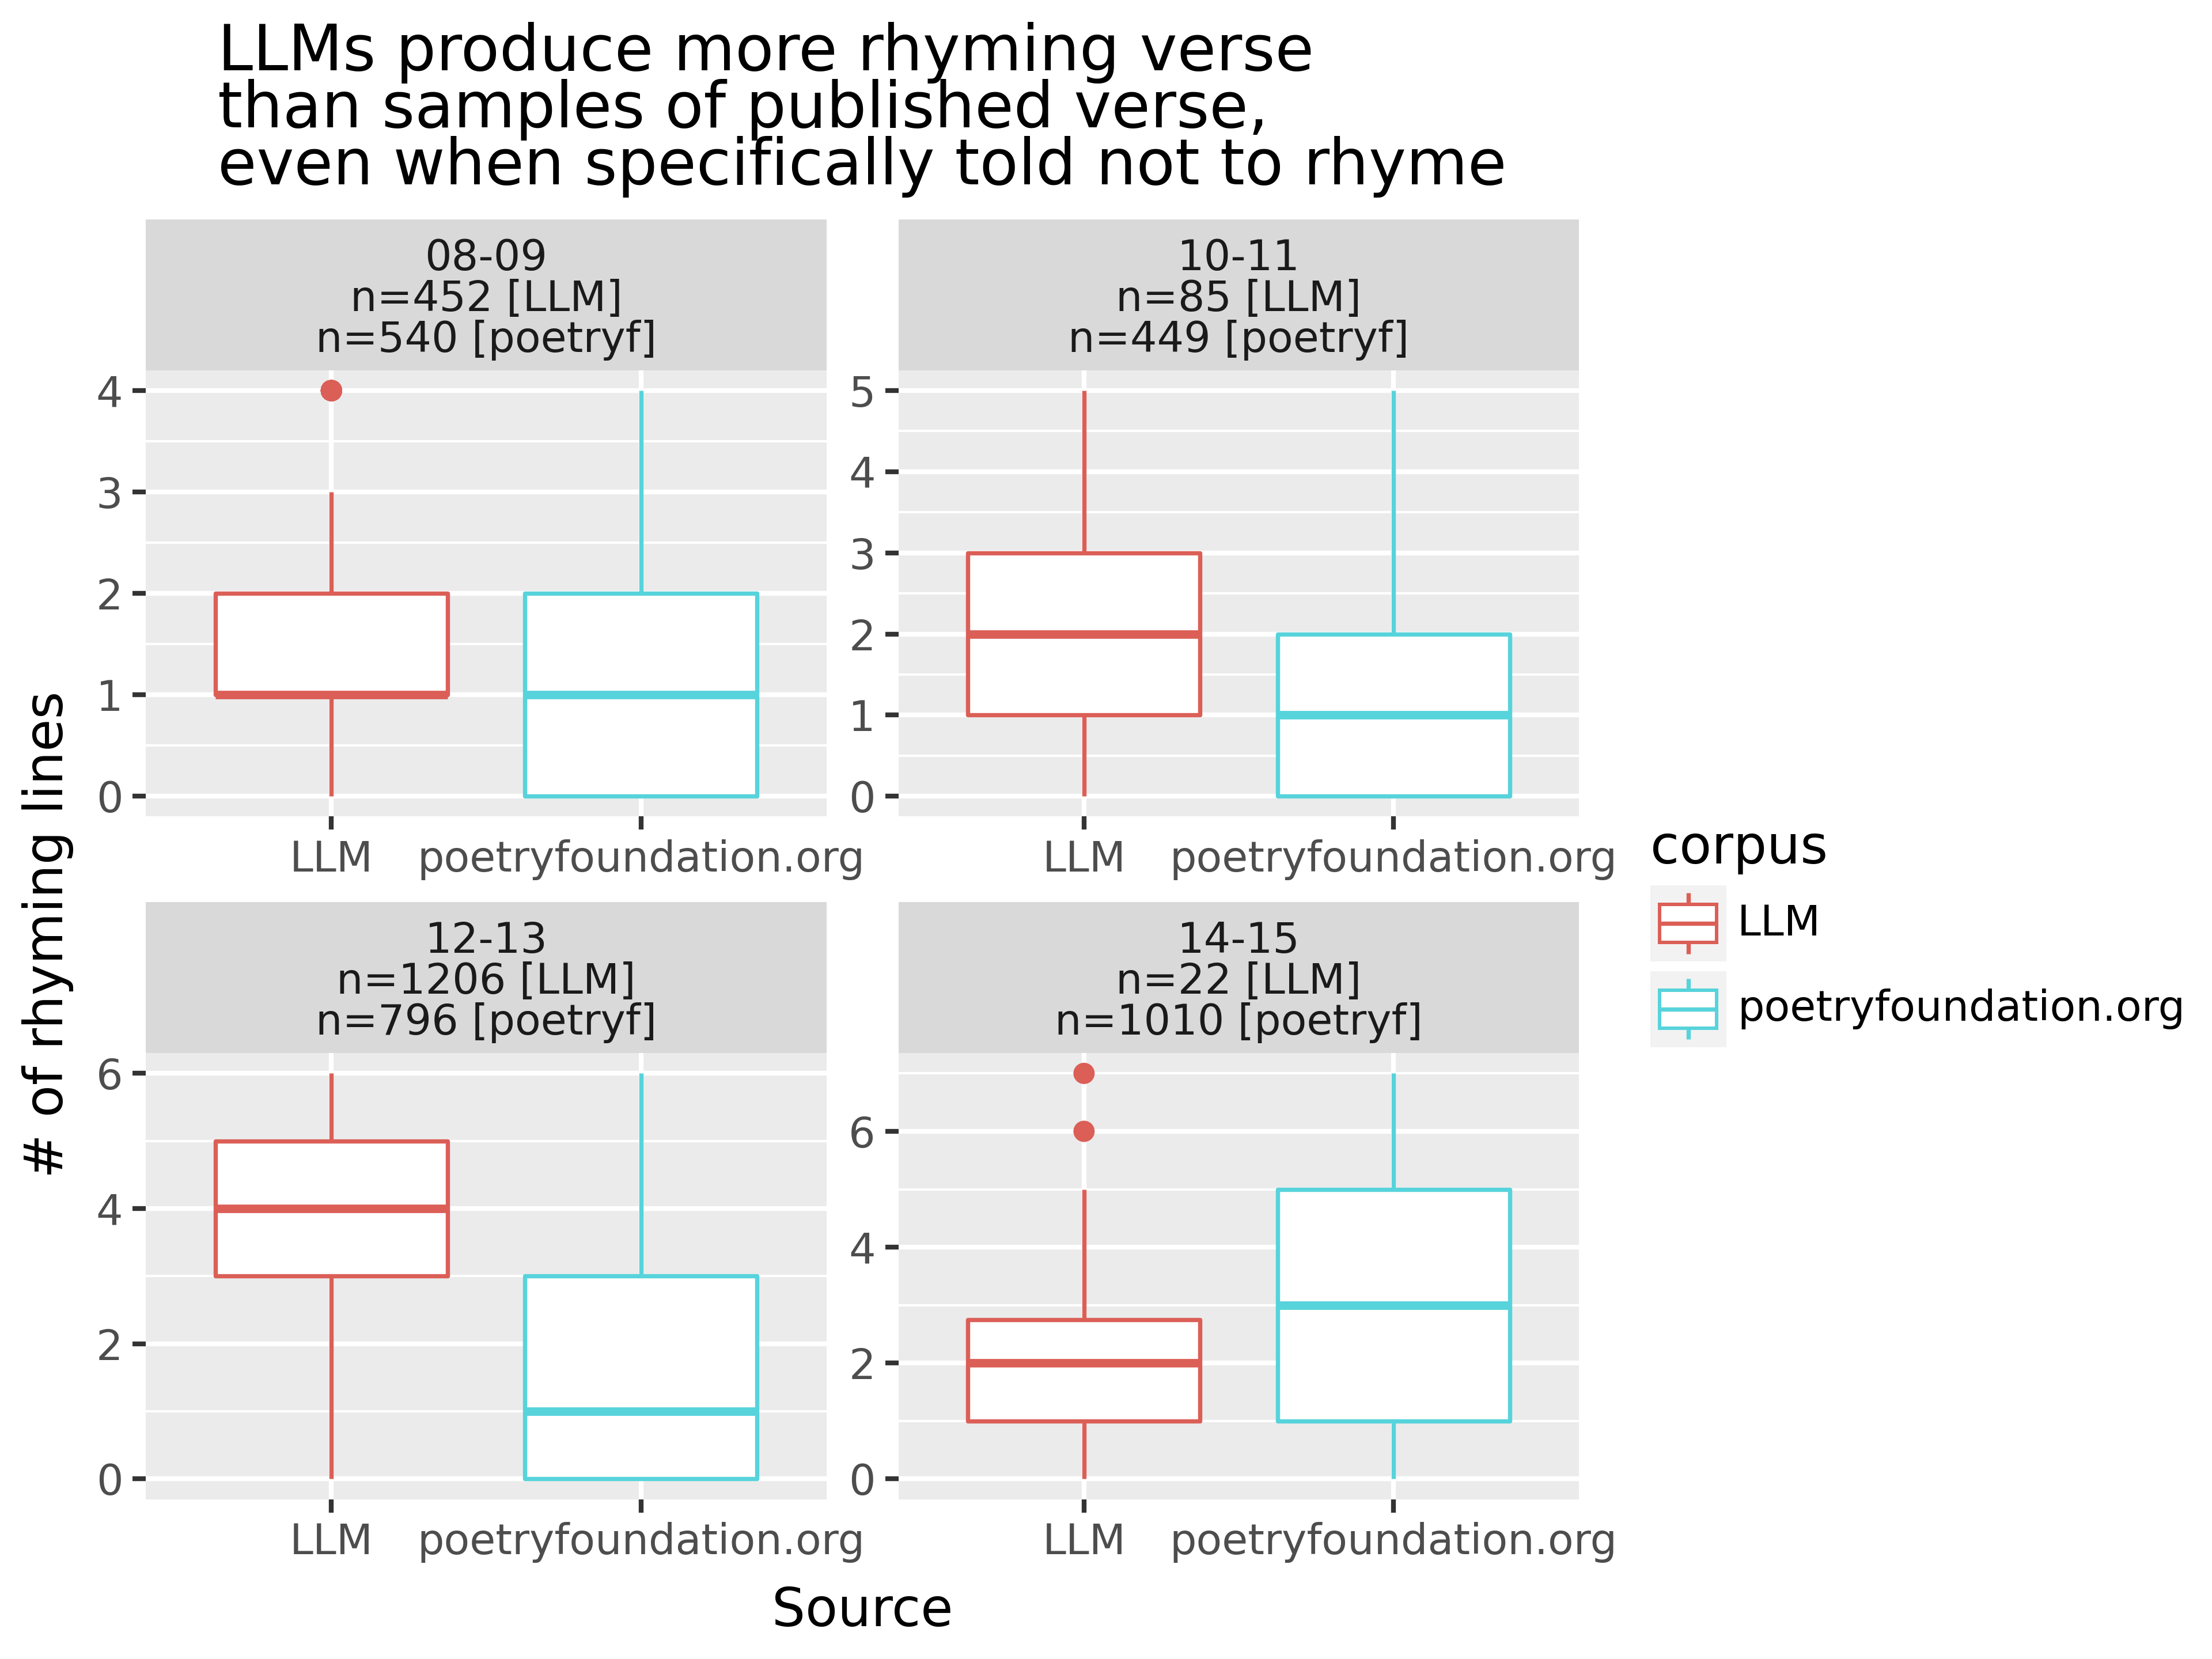

In [8]:
df=odf
figdf = df.query('8 <=num_lines <=14')
figdf['num_lines_bin']=figdf.num_lines.apply(
    lambda n: f'{(n//2*2):02}-{(n//2*2)+1:02}'
)
figdf['num_lines_bin_corpus']=figdf.apply(
    lambda row: f'{row.num_lines_bin} ({row.corpus})',
    axis=1
)
binsize=figdf.num_lines_bin_corpus.value_counts()
binsized=defaultdict(list)
for g,gdf in figdf.groupby(['num_lines_bin','corpus']):
    binsized[g[0]]+=[f'n={len(gdf)} [{g[1][:7]}]']
binsized={k:'\n'.join(v) for k,v in binsized.items()}

figdf['num_lines_bin_n']=figdf.num_lines_bin.apply(
    lambda nstr: f'{nstr}\n{binsized[nstr]}'
)

fig = (
    p9.ggplot(figdf, p9.aes(x='corpus', y='num_rhymes',color='corpus')) 
    + p9.geom_boxplot() 
    # + p9.geom_violin(
    #     draw_quantiles=[.5]
    #     # style='right'
    # ) 
    + p9.facet_wrap('num_lines_bin_n',scales='free')
    + p9.labs(
        y='# of rhyming lines',
        x='Source',
        title='LLMs produce more rhymes than published verse\neven when specifically told not to rhyme'
    )
)
fig.save(os.path.join(PATH_DATA,'fig.boxplots.rhyme.png'))
fig

In [38]:
# df=odf
# figdf = df
# fig = p9.ggplot(figdf, p9.aes(x='corpus', y='num_rhymes',color='corpus')) + p9.geom_violin()
# fig

In [ ]:
df = odf
df['corpus_model']=[f'{corpus}_{model}' if model else corpus for corpus,model in zip(df.corpus, df.model)]

figdf = df.query('num_lines <= 25')
p9.ggplot(figdf, p9.aes(x='lines_per_rhyme', color='corpus_model')) + p9.geom_density()

In [40]:
# fig = p9.ggplot(figdf, p9.aes(x='num_lines', y='num_rhymes', color='corpus', size='group_count'))
# fig += p9.geom_abline(intercept=0, slope=1, linetype='dashed')
# fig+= p9.geom_point()
# fig+= p9.geom_density_2d()
# fig+=p9.scale_y_continuous(limits=(0,25))
# fig+=p9.scale_x_continuous(limits=(0,25))
# fig+=p9.theme_minimal()
# fig+=p9.labs(
#     x='Number of lines',
#     y='Number of rhymes',
#     color='corpus',
#     title='LLM verse has more rhymes per line\nthan ~published verse (poetryfoundation.org)'
# )
# fig.save('fig.2ddensity.strict_rhyme.png')
# fig